# Hotel booking

### Initialization

In [10]:
# Setup

# common:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

# for ML:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
import eli5 # Feature importance evaluation



# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

import warnings
warnings.filterwarnings('ignore')

In [11]:
# load data:
full_data = pd.read_csv('data.csv')

In [12]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()
#full_data = AV.AutoViz('data.csv')

In [13]:
full_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              01-07-2015  
1                          0          Check-Out              01-07-2015  
2                          0          Check-Out              02-07-2015  
3                          0          Check-Out              02-07-2015  
4                          1          Check-Out              03-07-2015

In [14]:
full_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data Cleaning

In [16]:
#No value for children --> No children
#No value for agent --> Booked individually
#No value for company --> Private/Individual
NaN_replacements = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}
full_data_clean = full_data.fillna(NaN_replacements)
#All the undefined meals are considered as SC meals
full_data_clean["meal"].replace("Undefined", "SC", inplace=True)
#Data points with 0 occupants(0 adults + 0 children + 0 babies) are removed
zero_guests = list(full_data_clean[full_data_clean["adults"]
                   + full_data_clean["children"]
                   + full_data_clean["babies"]==0].index)
full_data_clean.drop(full_data_clean.index[zero_guests], inplace=True)

In [17]:
full_data_clean.to_csv(r'Hotel3.csv', index = False)

In [18]:
full_data_clean.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              01-07-2015  
1                          0          Check-Out              01-07-2015  
2                          0          Check-Out              02-07-2015  
3                          0          Check-Out              02-07-2015  
4                          1          Check-Out              03-07-2015

## EDA

Topics covered and questions to answer from the data:
- Where do the guests come from?
- How much do guests pay for a room per night?
- How does the price per night vary over the year?
- Which are the most busy month?
- How long do people stay at the hotels?
- Bookings by market segment
- How many bookings were canceled?
- Which month have the highest number of cancelations?
- Number of cancelations by repeated guests vs first time guests

In [19]:
#Separating the data on the basis of hotels
resort = full_data_clean[full_data_clean['hotel'] == 'Resort Hotel']
city = full_data_clean[full_data_clean['hotel'] == 'City Hotel']

In [20]:
city.head()

hotel  is_canceled  lead_time  arrival_date_year  \
40060  City Hotel            0          6               2015   
40061  City Hotel            1         88               2015   
40062  City Hotel            1         65               2015   
40063  City Hotel            1         92               2015   
40064  City Hotel            1        100               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40060               July                        27                          1   
40061               July                        27                          1   
40062               July                        27                          1   
40063               July                        27                          1   
40064               July                        27                          2   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
40060                        0                     2       1       0.0   
40061                        0                     4       2       0.0   
40062                        0                     4       1       0.0   
40063                        2                     4       2       0.0   
40064                        0                     2       2       0.0   

       babies meal country market_segment distribution_channel  \
40060       0   HB     PRT  Offline TA/TO                TA/TO   
40061       0   BB     PRT      Online TA                TA/TO   
40062       0   BB     PRT      Online TA                TA/TO   
40063       0   BB     PRT      Online TA                TA/TO   
40064       0   BB     PRT      Online TA                TA/TO   

       is_repeated_guest  previous_cancellations  \
40060                  0                       0   
40061                  0                       0   
40062                  0                       0   
40063                  0                       0   
40064                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
40060                               0                  A                  A   
40061                               0                  A                  A   
40062                               0                  A                  A   
40063                               0                  A                  A   
40064                               0                  A                  A   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
40060                0   No Deposit    6.0      0.0                     0   
40061                0   No Deposit    9.0      0.0                     0   
40062                0   No Deposit    9.0      0.0                     0   
40063                0   No Deposit    9.0      0.0                     0   
40064                0   No Deposit    9.0      0.0                     0   

      customer_type   adr  required_car_parking_spaces  \
40060     Transient   0.0                            0   
40061     Transient  76.5                            0   
40062     Transient  68.0                            0   
40063     Transient  76.5                            0   
40064     Transient  76.5                            0   

       total_of_special_requests reservation_status reservation_status_date  
40060                          0          Check-Out              03-07-2015  
40061                          1           Canceled              01-07-2015  
40062                          1           Canceled              30-04-2015  
40063                          2           Canceled              23-06-2015  
40064                          1           Canceled              02-04-2015

### Cancellation by repeated guests

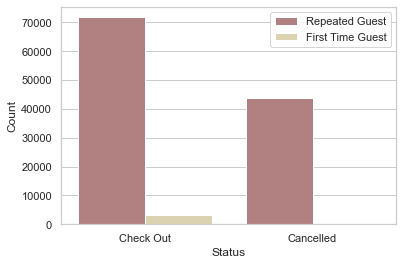

In [21]:
#Let's check how many have cancelled their booking in the respective hotels

ax = sns.countplot(x="is_canceled", hue="is_repeated_guest", data=full_data_clean, palette = 'pink')
ax.set(xlabel='Status', ylabel='Count')
positions = (0, 1)
labels = ("Check Out", "Cancelled")
ax.set_xticklabels(labels)
LAB = {'Repeated Guest','First Time Guest'}
ax.legend(labels=LAB)

As we can see the proportion of repeated guests cancelling the booking is very much lower than those who have booked for the first time

In [22]:
#Now we extract those bookings which havent been cancelled and analyze it
rc = resort[resort['is_canceled'] == 0]
cc = city[city['is_canceled'] == 0]

### Most Busy Month

Text(0, 0.5, 'Number of Bookings')

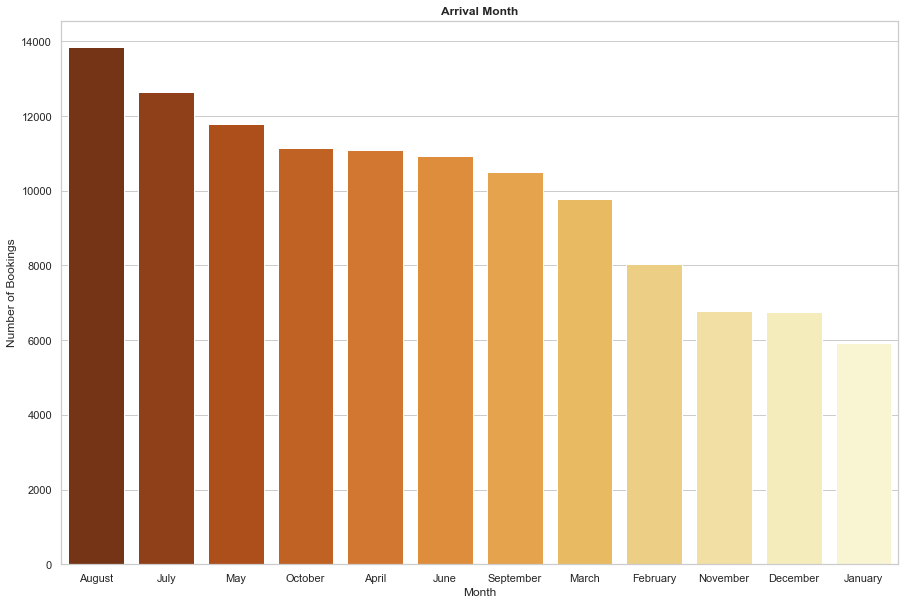

In [23]:
#`arrival_date_month` exploration 

plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = full_data_clean,
              order=pd.value_counts(full_data_clean['arrival_date_month']).index, palette='YlOrBr_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)

As we can see, most bookings were done in the month of August and the least bookings were done in the month of January

### Where do the guests come from?

In [24]:
# get number of acutal guests by country
country_data = pd.DataFrame(full_data_clean[full_data_clean["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

As we can see, around 28% of natives book rooms in the hotels, rest are from outside the country

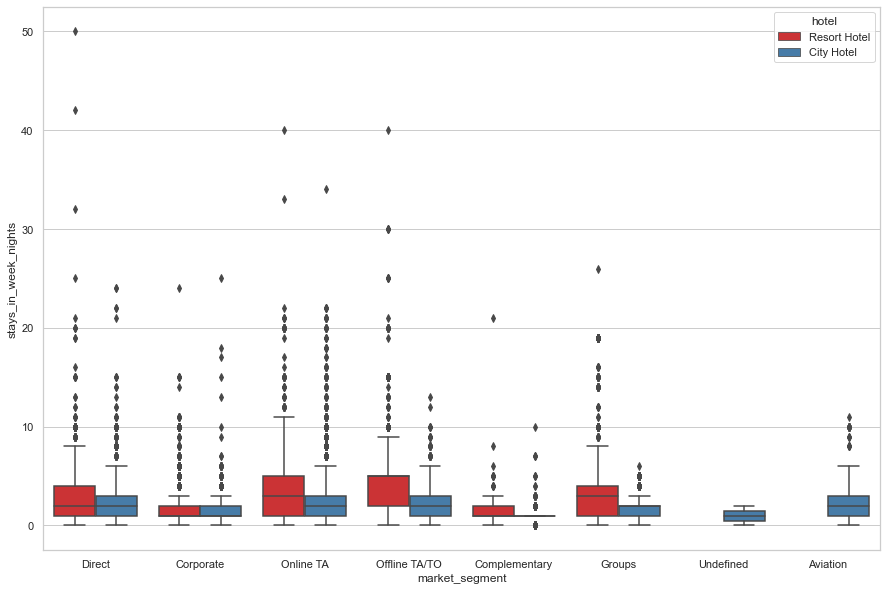

In [25]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

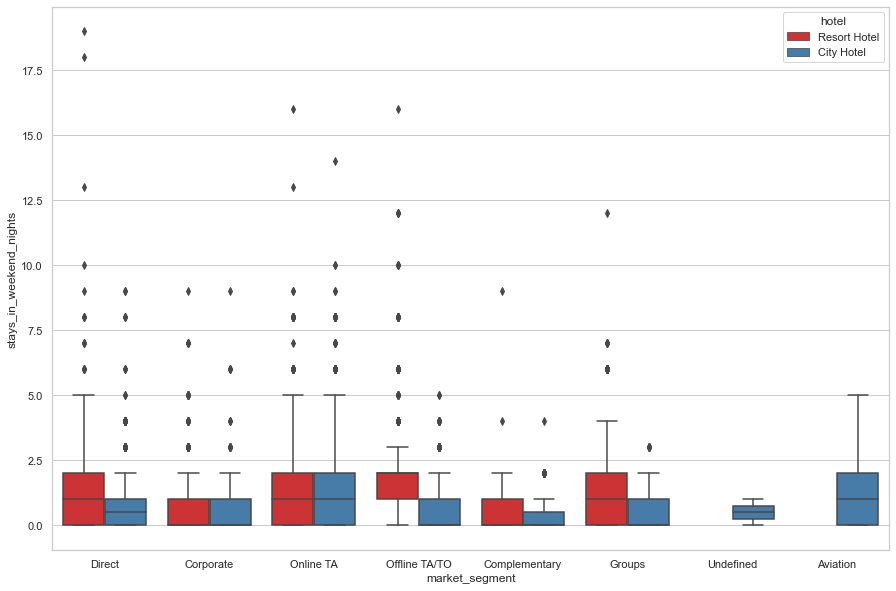

In [26]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

In [27]:
full_data_clean['number_of_nights'] = full_data_clean['stays_in_weekend_nights'] + full_data_clean['stays_in_week_nights']

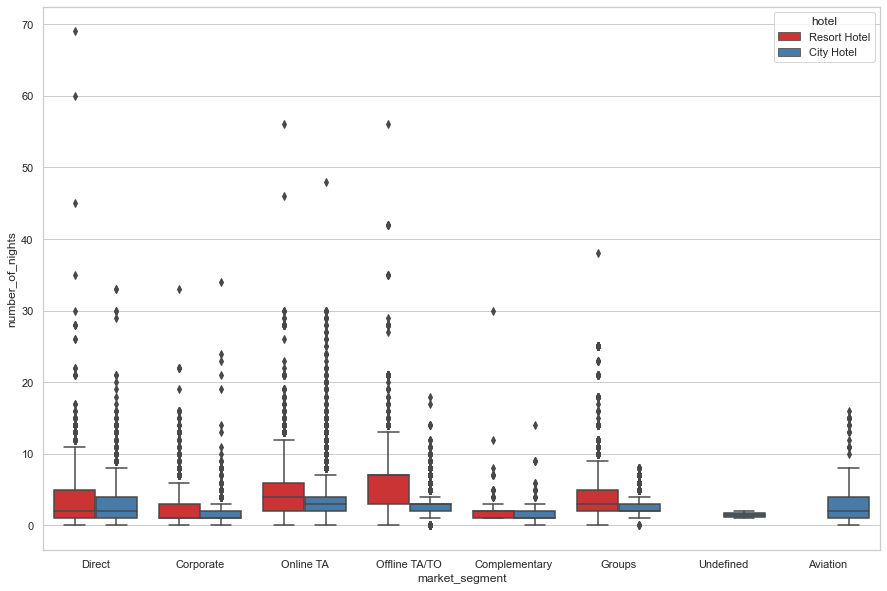

In [28]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "number_of_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

- On average, Most customers stay in the hotels for not more than one week
- Customers from the Aviation Industry stay in City hotel only

Customers in the Aviation Segment are likely to arrive shortly due to business. Also probably most airports are a bit away from sea and its most likely to be closer to city hotels.

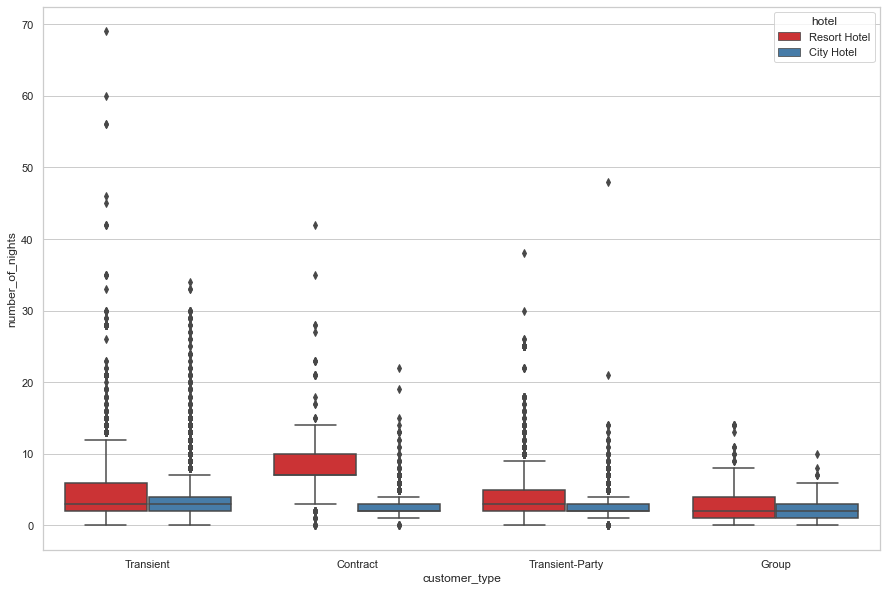

In [29]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "customer_type", y = "number_of_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

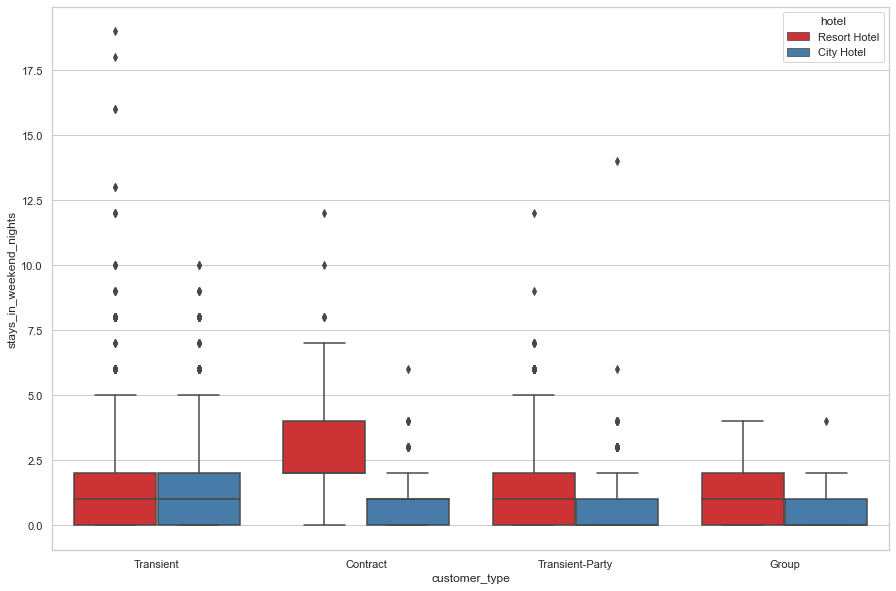

In [30]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "customer_type", y = "stays_in_weekend_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

[Text(0.5, 0, 'Customer Type')]

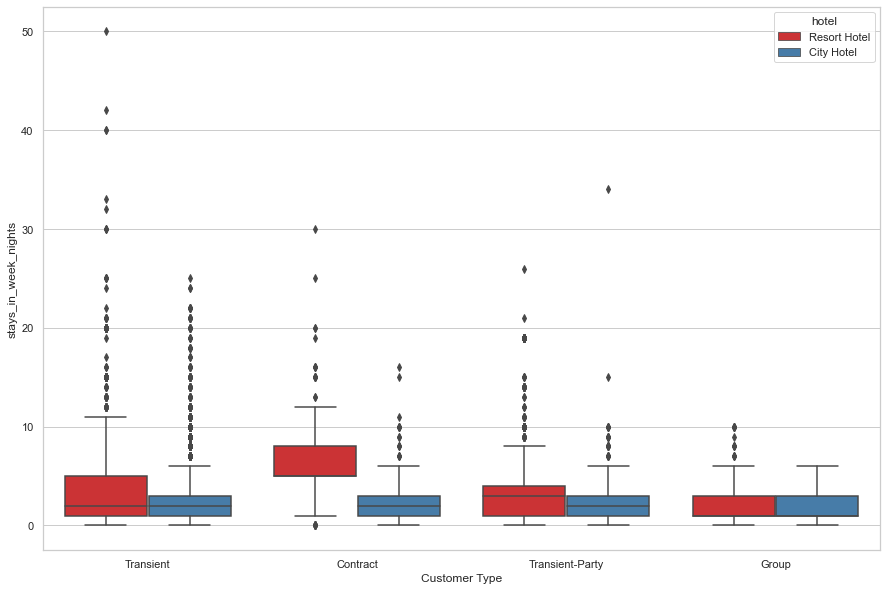

In [31]:
plt.figure(figsize = (15,10))
ab = sns.boxplot(x = "customer_type", y = "stays_in_week_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');
ab.set(xlabel='Customer Type')

On average, Contract-type customers tend to spend most days in the hotel

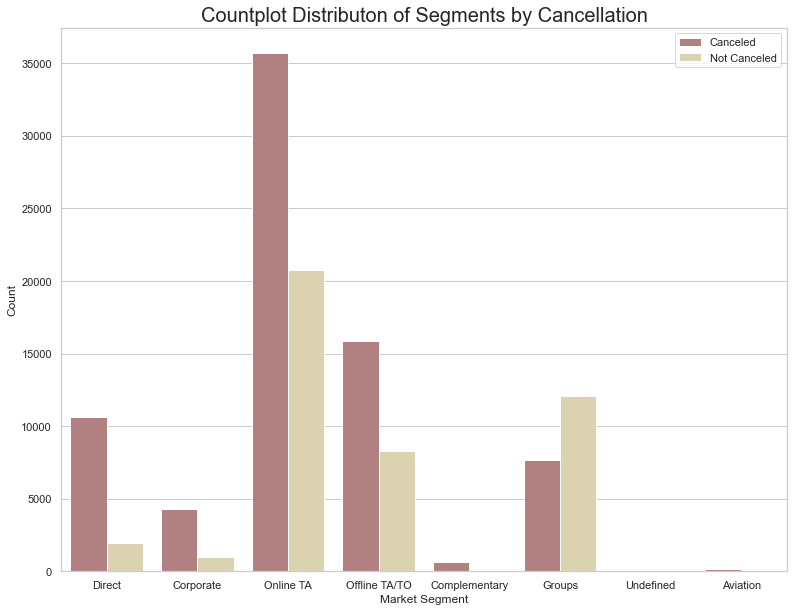

In [32]:
plt.figure(figsize = (13,10))
ax = sns.countplot(x="market_segment", hue="is_canceled", data=full_data_clean, palette = 'pink')
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
LAB = {'Canceled','Not Canceled'}
ax.legend(labels=LAB)

Text(0.5, 1.0, 'Countplot Distributon of Segments by Cancellation')

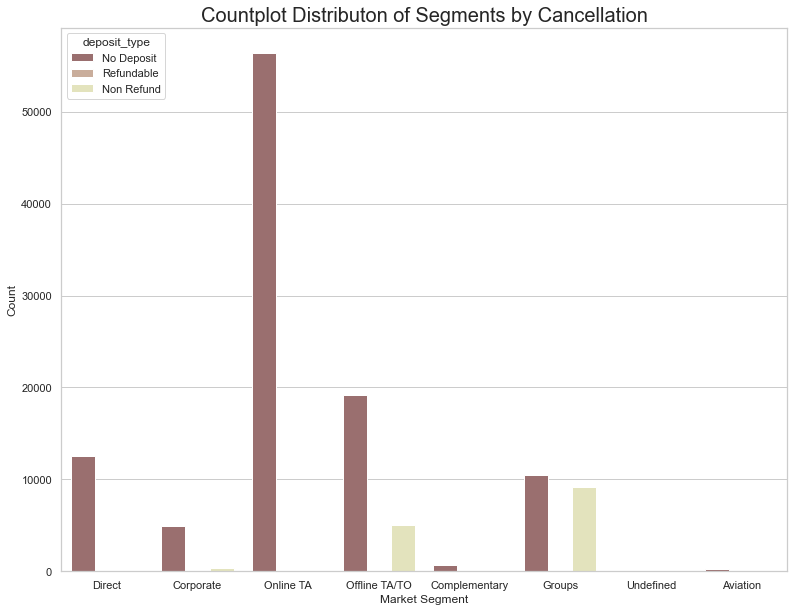

In [33]:
plt.figure(figsize = (13,10))
ax = sns.countplot(x="market_segment", hue="deposit_type", data=full_data_clean, palette = 'pink')
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})

Looking at Offline TA/TO and Groups, the situations where the deposit was received were only in the scenarios where the groups came. It is quite logical to apply a deposit for a large number of customers who will fill important amount of the hotel capacity.

As a first thought, I expected the cancellation rate in the market segments where a deposit is applied to be lower than the other segments where no deposit applied. But when we look at the cancellations according to the segments in the other visualization, it seems that this is not the case.

- Groups segment has cancellation rate more than 50%.
- Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%.
- Direct segment has cancellation rate less than 20%.

It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like reservations may explain this situation a bit.

Cancellation rates for online reservations are as expected in a dynamic environment where the circulation is high.

Another situation that took my attention is that the cancellation rate in the direct segment is so low. At this point, I think that a mutual trust relationship has been established in case people are communicating one to one

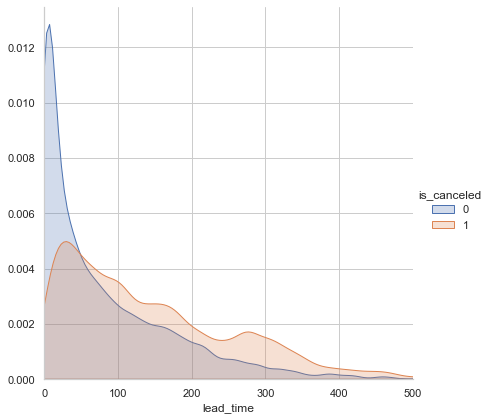

In [34]:
(sns.FacetGrid(full_data_clean, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

While lead time is more than roughly 60, people tend to cancel their reservations (cancellation rate is higher after this point). 
Also people want their holiday or work plans resulted in 100 days which equals to half of the data.

Monthly Cancellations and Customers by Hotel Types

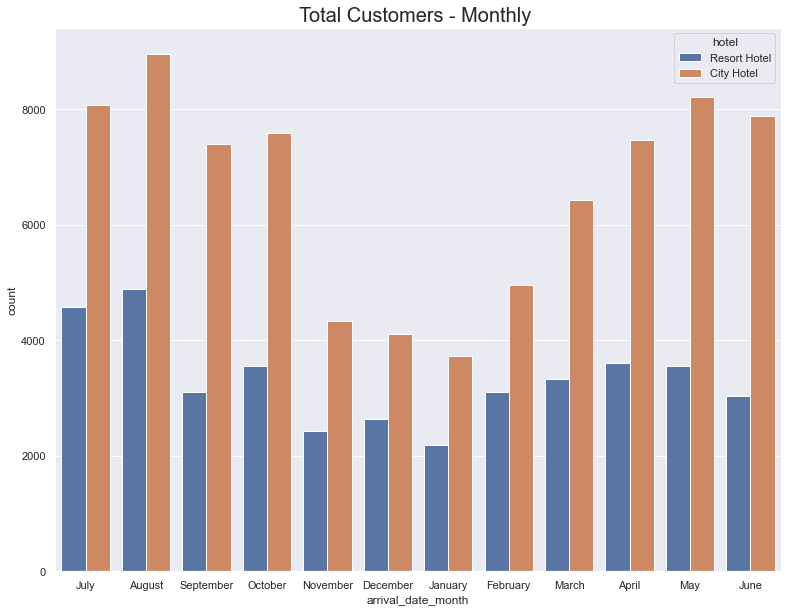

In [35]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = full_data_clean)

### How much do guests pay for a room per night?  
Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot.   
Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR. 

In [36]:
rc["adr_pp"] = rc["adr"] / (rc["adults"] + rc["children"])
cc["adr_pp"] = cc["adr"] / (cc["adults"] + cc["children"])

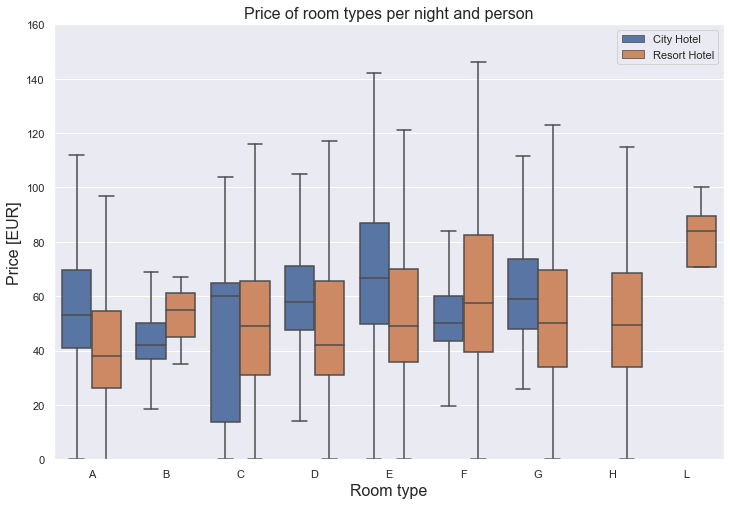

In [37]:
full_data_clean["adr_pp"] = full_data_clean["adr"] / (full_data_clean["adults"] + full_data_clean["children"])
full_data_guests = full_data_clean[full_data_clean["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

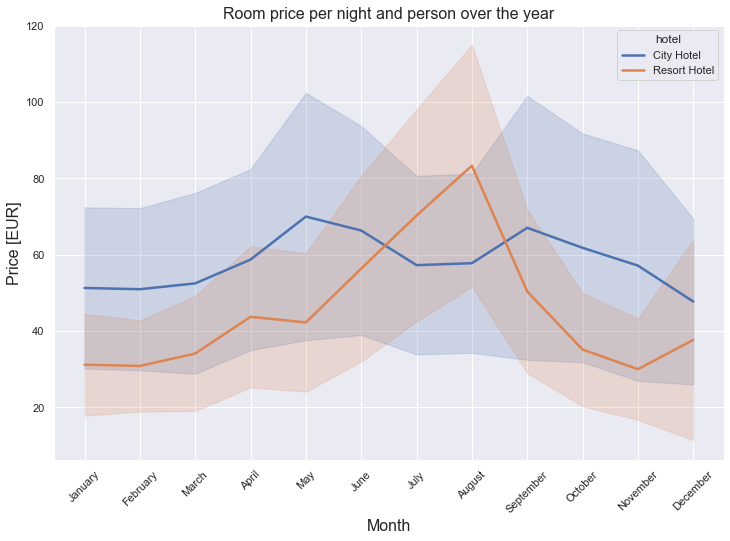

In [38]:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

### How does the price per night vary over the year?

Text(0.5, 1.0, 'ADR vs Arrival Month')

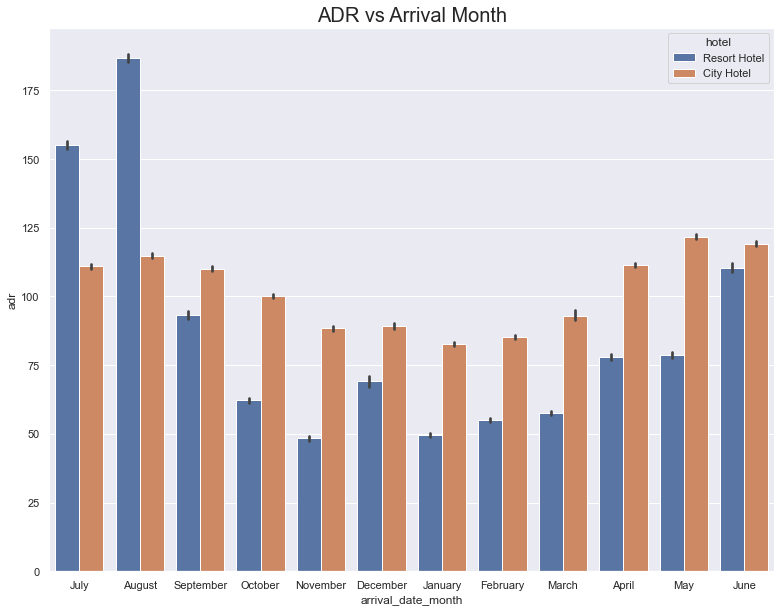

In [39]:
plt.figure(figsize =(13,10))
ax = sns.barplot(x='arrival_date_month', y="adr",hue="hotel",data=full_data_clean)
plt.title("ADR vs Arrival Month", fontdict={'fontsize': 20})
#ADR is the average daily rate of the hotel


### Cancelation Vs Lead Time

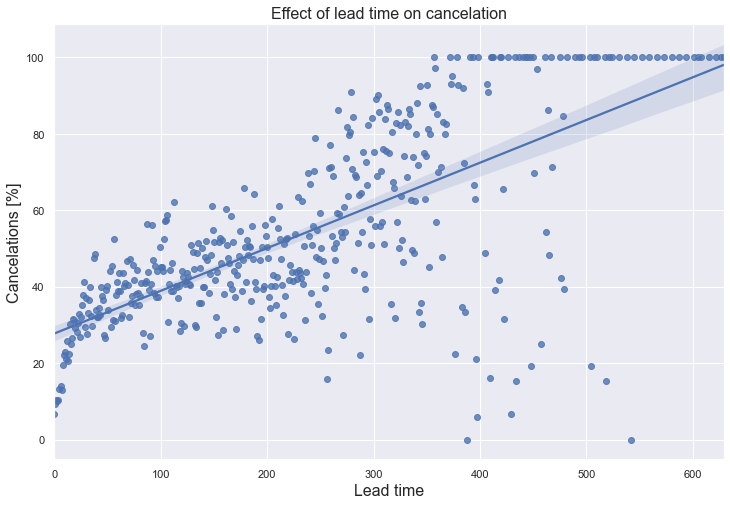

In [40]:
# group data for lead_time:
lead_cancel_data = full_data_clean.groupby("lead_time")["is_canceled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

Bookings made a few days before the arrival date are rarely canceled, whereas bookings made over one year in advance are canceled very often.

## Feature Engineering and Correlation Matrix

In [41]:
labelencoder = LabelEncoder()
full_data_clean['hotel'] = labelencoder.fit_transform(full_data_clean['hotel'])
full_data_clean['arrival_date_month'] = labelencoder.fit_transform(full_data_clean['arrival_date_month'])
full_data_clean['meal'] = labelencoder.fit_transform(full_data_clean['meal'])
full_data_clean['country'] = labelencoder.fit_transform(full_data_clean['country'])
full_data_clean['market_segment']= labelencoder.fit_transform(full_data_clean['market_segment'])
full_data_clean['distribution_channel']=labelencoder.fit_transform(full_data_clean['distribution_channel'])
full_data_clean['is_repeated_guest'] = labelencoder.fit_transform(full_data_clean['is_repeated_guest'])
full_data_clean['reserved_room_type'] = labelencoder.fit_transform(full_data_clean['reserved_room_type'])
full_data_clean['assigned_room_type'] = labelencoder.fit_transform(full_data_clean['assigned_room_type'])
full_data_clean['deposit_type'] = labelencoder.fit_transform(full_data_clean['deposit_type'])
full_data_clean['agent'] = labelencoder.fit_transform(full_data_clean['agent'])
full_data_clean['customer_type'] = labelencoder.fit_transform(full_data_clean['customer_type'])
full_data_clean['reservation_status'] = labelencoder.fit_transform(full_data_clean['reservation_status'])
full_data_clean['reservation_status_date'] = labelencoder.fit_transform(full_data_clean['reservation_status_date'])

Categorical labels converted into numerical form. This will help to be more understandable and implementable into machine learning algorithms. Some features are not ordinal such as country. In that case, One-Hot Encoding could be chosen. Due to the high number of categories, this method could incur higher computational cost. To help reducing that, Label Encoding method will be used.

In [42]:
full_data_clean.head()

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   5   
1      1            0        737               2015                   5   
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   meal  country  market_segment  distribution_channel  is_repeated_guest  \
0     0      135               3                     1                  0   
1     0      135               3                     1                  0   
2     0       59               3                     1                  0   
3     0       59               2                     0                  0   
4     0       59               6                     3                  0   

   previous_cancellations  previous_bookings_not_canceled  reserved_room_type  \
0                       0                               0                   2   
1                       0                               0                   2   
2                       0                               0                   0   
3                       0                               0                   0   
4                       0                               0                   0   

   assigned_room_type  booking_changes  deposit_type  agent  company  \
0                   2                3             0      0      0.0   
1                   2                4             0      0      0.0   
2                   2                0             0      0      0.0   
3                   0                0             0    221      0.0   
4                   0                0             0    174      0.0   

   days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
0                     0              2   0.0                            0   
1                     0              2   0.0                            0   
2                     0              2  75.0                            0   
3                     0              2  75.0                            0   
4                     0              2  98.0                            0   

   total_of_special_requests  reservation_status  reservation_status_date  \
0                          0                   1                       15   
1                          0                   1                       15   
2                          0                   1                       46   
3                          0                   1                       46   
4                          1                   1                       76   

   number_of_nights  adr_pp  
0                 0     0.0  
1                 0     0.0  
2                 1    75.0  
3                 1    75.0  
4                 2    49.0

In [43]:
# Create new feature:`all_children` with merge children and baby features

full_data_clean['all_children'] = full_data_clean['children'] + full_data_clean['babies']
pd.crosstab(full_data_clean['adults'], full_data_clean['all_children'], margins=True, margins_name = 'Total').iloc[:8]

all_children    0.0   1.0   2.0  3.0  9.0  10.0  Total
adults                                                
0                 0     4   205   14    0     0    223
1             22577   286   157    6    1     0  23027
2             81560  4658  3369   91    0     2  89680
3              5666   495    41    0    0     0   6202
4                59     3     0    0    0     0     62
5                 2     0     0    0    0     0      2
6                 1     0     0    0    0     0      1
10                1     0     0    0    0     0      1

In [44]:
data_categorical = full_data_clean[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status','all_children']]
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   hotel                 119210 non-null  int32  
 1   is_canceled           119210 non-null  int64  
 2   arrival_date_month    119210 non-null  int32  
 3   meal                  119210 non-null  int32  
 4   country               119210 non-null  int32  
 5   market_segment        119210 non-null  int32  
 6   distribution_channel  119210 non-null  int32  
 7   is_repeated_guest     119210 non-null  int64  
 8   reserved_room_type    119210 non-null  int32  
 9   assigned_room_type    119210 non-null  int32  
 10  deposit_type          119210 non-null  int32  
 11  agent                 119210 non-null  int64  
 12  customer_type         119210 non-null  int32  
 13  reservation_status    119210 non-null  int32  
 14  all_children          119210 non-null  float64
dtype

In [45]:
data_numerical= full_data_clean.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status','all_children','adr_pp'], axis = 1)
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119210 non-null  int64  
 1   arrival_date_year               119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   stays_in_weekend_nights         119210 non-null  int64  
 5   stays_in_week_nights            119210 non-null  int64  
 6   adults                          119210 non-null  int64  
 7   children                        119210 non-null  float64
 8   babies                          119210 non-null  int64  
 9   previous_cancellations          119210 non-null  int64  
 10  previous_bookings_not_canceled  119210 non-null  int64  
 11  booking_changes                 119210 non-null  int64  
 12  company         

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

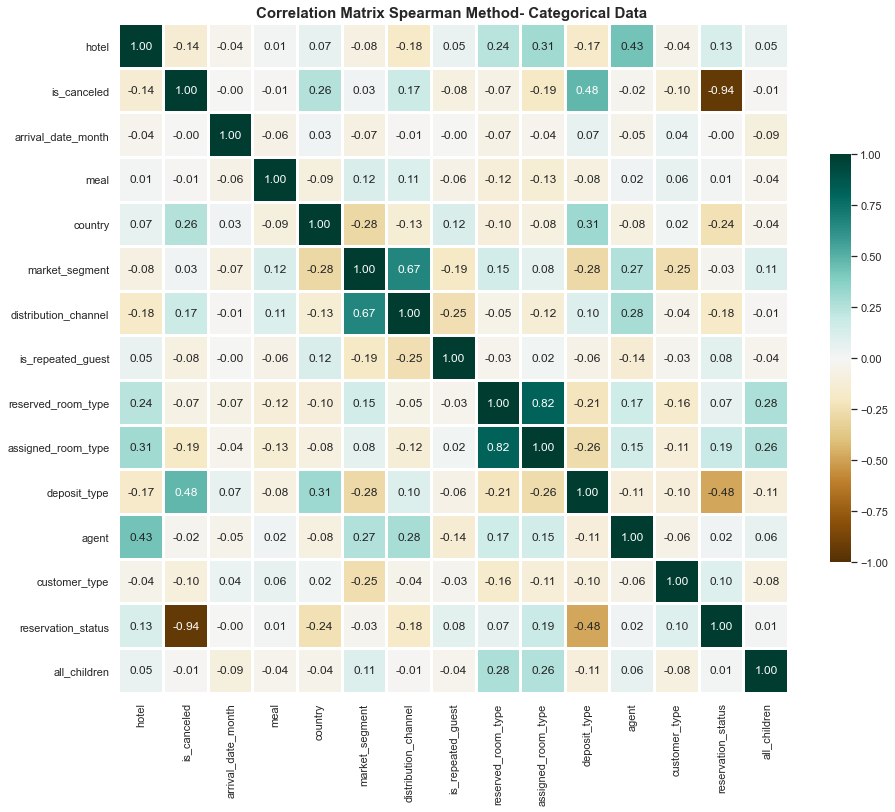

In [46]:
# Spearman Method
plt.figure(figsize=(15,15))
corr_categorical=data_categorical.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix Pearson Method- Numerical Data ')

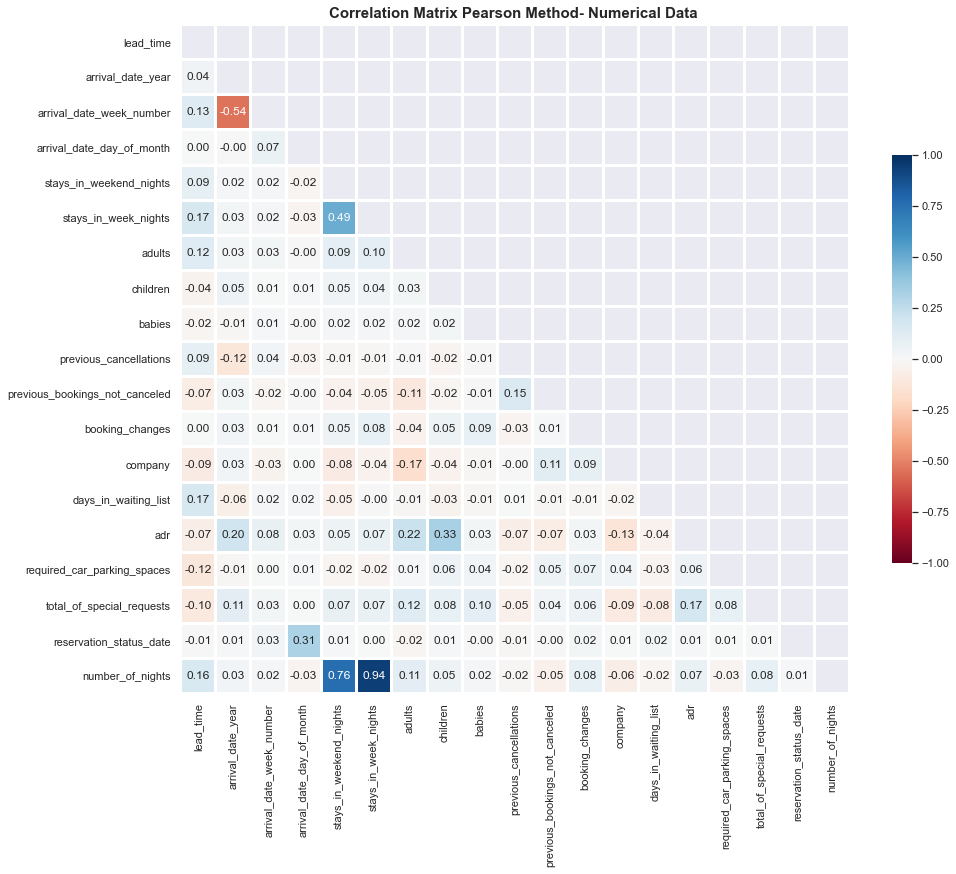

In [47]:
# Correlation Matrix with pearson method

plt.figure(figsize=(15,15))
corr_numerical=data_numerical.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(19, 0))
plt.title("Correlation Matrix Pearson Method- Numerical Data ",size=15, weight='bold')

Finding high correlated features

In [48]:
corr_mask_categorical = corr_categorical.mask(mask_categorical)
corr_values_categorical = [c for c in corr_mask_categorical.columns if any (corr_mask_categorical[c] > 0.90)]
corr_mask_numerical = corr_numerical.mask(mask_numerical)
corr_values_numerical = [c for c in corr_mask_numerical.columns if any (corr_mask_numerical[c] > 0.90)]
print(corr_values_categorical, corr_values_numerical)

[] ['stays_in_week_nights']


We have converted strings and object data into machine readable format

In [49]:
print('customer_type:', full_data_clean['customer_type'].unique())
print('reservation_status', full_data_clean['reservation_status'].unique())
print('deposit_type', full_data_clean['deposit_type'].unique())
print('assigned_room_type', full_data_clean['assigned_room_type'].unique())
print('meal', full_data_clean['meal'].unique())
print('Country:',full_data_clean['country'].unique())
print('Dist_Channel:',full_data_clean['distribution_channel'].unique())
print('Market_seg:', full_data_clean['market_segment'].unique())
print('reserved_room_type:', full_data_clean['reserved_room_type'].unique())


customer_type: [2 0 3 1]
reservation_status [1 0 2]
deposit_type [0 2 1]
assigned_room_type [ 2  0  3  4  6  5  8  1  7 10  9]
meal [0 1 2 3]
Country: [135  59 169  51  76  56 171 139 124 127   6 133  43  15  29  34  66  81
 123  46 140 154  11  52  42  25  54 113  27 100 153   3  75  31 107 103
 166 148 101 134 149  30  12  23  99 162 175   1  80  40 176  37 177  48
  91  38  72   5 161  82  71  69  77  60   4  63 168  83  28  41  35  61
  92 121 106 172 152  55  86 128  73  94 131 144 155  13  20 126 158  47
 108 117   7  85  98  39  33  22 115  36 151 165  19  32  84 156 145  14
 142 174 132 138  50 130 110 116  49 105  79 170 125  21 102 157 163  44
 150  90  53  78  70 141  88 104  18  74 159 122  16 173 164  58  62 160
  64  87  97  65 112 167 118  57 111 129  17  95 109 119  24 136  26   0
   2 147  45 137  68  96   9  67   8 114 120  89 143  10 146  93]
Dist_Channel: [1 0 3 4 2]
Market_seg: [3 2 6 5 1 4 7 0]
reserved_room_type: [2 0 3 4 6 5 7 8 1]


In [50]:
new_data = full_data_clean.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

### Predict Cancellation

In [51]:
cancel_corr = full_data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

From this list it is apparent that lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations are the 5 most important numerical features.

However, to predict wheater or not a booking will be canceled, the number of booking changes is a possible source of leakage, because this information can change over time.
I will also not include days_in_waiting_list and arrival_date_year.

In [52]:
full_data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

# Feature Engineering 

### Data Preprocessing for Feature Engineering

In [53]:
# manually choose columns to include
# some columns are excluded to make the model more general and to prevent leakage
# (arrival_date_year, assigned_room_type, booking_changes, reservation_status, country,
# days_in_waiting_list)
# including the country would increase accuracy, but it may also make the model less general

num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separate features and predicted value
features = num_features + cat_features
X = full_data.drop(["is_canceled"], axis=1)[features]
y = full_data["is_canceled"]

#Creating Pipeline for the full_data
# preprocess numerical feats:
# for most num cols, except the dates, 0 is the most logical choice as fill value
# and here no dates are missing.
num_transformer = SimpleImputer(strategy="constant")

#Creating Pipeline for both kinds of data
# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [54]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# split data into 'kfolds' parts for cross validation,
# use shuffle to ensure random distribution of data:
kfolds = 4 # 4 = 75% train, 25% validation
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

DT_model cross validation accuarcy score: 0.8246 +/- 0.0016 (std) min: 0.8221, max: 0.8263, 
RF_model cross validation accuarcy score: 0.8664 +/- 0.0012 (std) min: 0.8646, max: 0.8676, 
LR_model cross validation accuarcy score: 0.7937 +/- 0.0011 (std) min: 0.792, max: 0.7952, 
XGB_model cross validation accuarcy score: 0.8473 +/- 0.0011 (std) min: 0.8456, max: 0.8487, 


The RandomForest model performs best with 86.64% accuracy.

In [55]:
# Enhanced RF model with the best parameters I found:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Enhanced RF model cross validation accuarcy score: 0.8681 +/- 0.0006 (std) min: 0.8673, max: 0.869


In [56]:
# fit model(pipeline) so values can be accessed:
model_pipe.fit(X,y)

# Names of all (encoded) features are needed.
# Get names of columns from One Hot Encoding:
onehot_columns = list(model_pipe.named_steps['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names(input_features=cat_features))

# Add num_features for full list.
# Order must be as in definition of X, where num_features are first: 
feat_imp_list = num_features + onehot_columns

# show 10 most important features, provide names of features:
feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)
feat_imp_df.head()

feature    weight       std
0                  lead_time  0.145140  0.015235
1    deposit_type_Non Refund  0.140641  0.108007
2                        adr  0.096222  0.003412
3    deposit_type_No Deposit  0.079059  0.106235
4  arrival_date_day_of_month  0.069410  0.002033